# Componente Practico Evaluacion Parcial 1
## Nombre: **Fernando Jose Ochoa Cobeña**

### Importamos las librerias 

In [1]:
# Librerías esenciales para análisis de datos
import pandas as pd          # Manejo de datos
import numpy as np           # Operaciones numéricas
import matplotlib.pyplot as plt  # Visualización
import seaborn as sns            # Visualización avanzada

from scipy.stats import shapiro, pearsonr  # Estadística básica

# Configuraciones estéticas de gráficos
plt.style.use("default")
sns.set()

### Carga de Archivos

In [2]:
archivo = 'iot_sensor_corrupted_dataset.csv'

### Descripcion de archivo ver valores numericos e informacion de  la tabla de los primeras filas

In [3]:
df = pd.read_csv(archivo)
print("\nprimeras filas")
print(df.head())
print("\nInformación de las columnas")
df.info()

df.head()


primeras filas
             timestamp device_id  temperature_C          humidity_% status
0  2030-05-15 00:00:00  ESP32_A2      26.490142  47.391160456649544     OK
1  2023-01-01 00:30:00  ESP32_A2      24.585207   69.17861947054776     OK
2  2023-01-01 01:00:00  ESP32_B1      26.943066               -10.0     OK
3  2023-01-01 01:30:00  ESP32_B1      29.569090   70.32465260551147     OK
4  2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK

Información de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      260 non-null    object 
 1   device_id      252 non-null    object 
 2   temperature_C  247 non-null    float64
 3   humidity_%     253 non-null    object 
 4   status         260 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.3+ KB


,timestamp,device_id,temperature_C,humidity_%,status
0,2030-05-15 00:00:00,ESP32_A2,26.490142,47.391160456649544,OK
1,2023-01-01 00:30:00,ESP32_A2,24.585207,69.17861947054776,OK
2,2023-01-01 01:00:00,ESP32_B1,26.943066,-10.0,OK
3,2023-01-01 01:30:00,ESP32_B1,29.569090,70.32465260551147,OK
4,2023-01-01 02:00:00,ESP32_A1,NaN,44.80630034045987,OK


###  Hacemos una copia de DataFrame cruso para no modificar el  original  y vemos los valores nulos de la tabla 

In [4]:
# Copiamos el DataFrame crudo para no modificar el original
df = df.copy()

# Vistazo general
print("Dimensiones del DataFrame:", df.shape)

print("\nInformación general del DataFrame:")
df.info()  # info() ya imprime por sí misma, no es necesario usar print()

print("\nValores nulos por columna:")
print(df.isnull().sum())

# Mostrar las primeras filas
df.head

Dimensiones del DataFrame: (260, 5)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      260 non-null    object 
 1   device_id      252 non-null    object 
 2   temperature_C  247 non-null    float64
 3   humidity_%     253 non-null    object 
 4   status         260 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.3+ KB

Valores nulos por columna:
timestamp         0
device_id         8
temperature_C    13
humidity_%        7
status            0
dtype: int64


<bound method NDFrame.head of                timestamp device_id  temperature_C          humidity_% status
0    2030-05-15 00:00:00  ESP32_A2      26.490142  47.391160456649544     OK
1    2023-01-01 00:30:00  ESP32_A2      24.585207   69.17861947054776     OK
2    2023-01-01 01:00:00  ESP32_B1      26.943066               -10.0     OK
3    2023-01-01 01:30:00  ESP32_B1      29.569090   70.32465260551147     OK
4    2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK
..                   ...       ...            ...                 ...    ...
255  2023-01-05 16:00:00  ESP32_A1      23.584204   76.44967713501283     OK
256  2023-01-02 05:00:00  ESP32_A2      25.993790   65.47097381170038     OK
257  2023-01-05 21:00:00  ESP32_A2      31.431832  52.436492547156966  FAIL 
258  2023-01-04 18:00:00  ESP32_A1      26.877002   48.16741487334225   FAIL
259  2023-01-01 02:00:00  ESP32_A1            NaN   44.80630034045987     OK

[260 rows x 5 columns]>

###  Vemos Duplicidad 

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
255     True
256     True
257    False
258     True
259     True
Length: 260, dtype: bool

###  Describimos los valores estadistico de la temperatura_C 

In [6]:
df.describe()

,temperature_C
count,247.000000
mean,60.495392
std,182.895532
min,17.140765
25%,23.027326
50%,25.261141
75%,27.048787
max,999.000000


###  Eliminamos valores nulos y duplicados 

In [8]:
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))

###  Conversimos en valores numeros la humedad y eliminados valores numeros en temperatura y humerdad 

In [11]:
# Convertimos humidity_% a float de forma segura
df['humidity_%'] = pd.to_numeric(df['humidity_%'], errors='coerce')

# Eliminamos filas con valores nulos en temperatura o humedad
df_clean = df.dropna(subset=['temperature_C', 'humidity_%'])


### Vemos que temperatura y humedad sean valores numericos

In [13]:
# Verificamos que sean numéricas
print(df_clean[['temperature_C', 'humidity_%']].dtypes)


temperature_C    float64
humidity_%       float64
dtype: object


# HISTOGRAMA

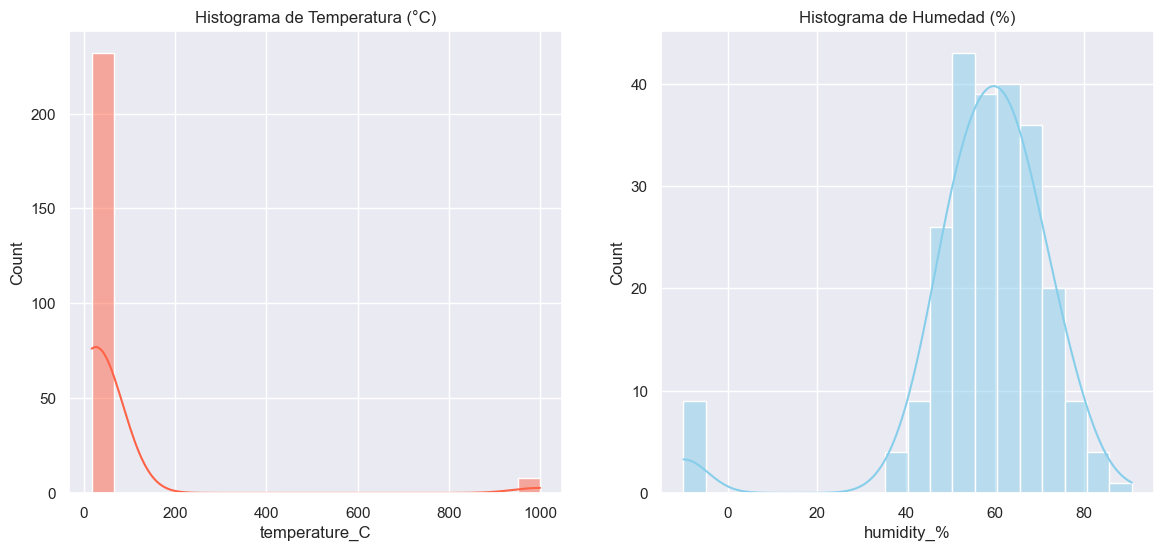

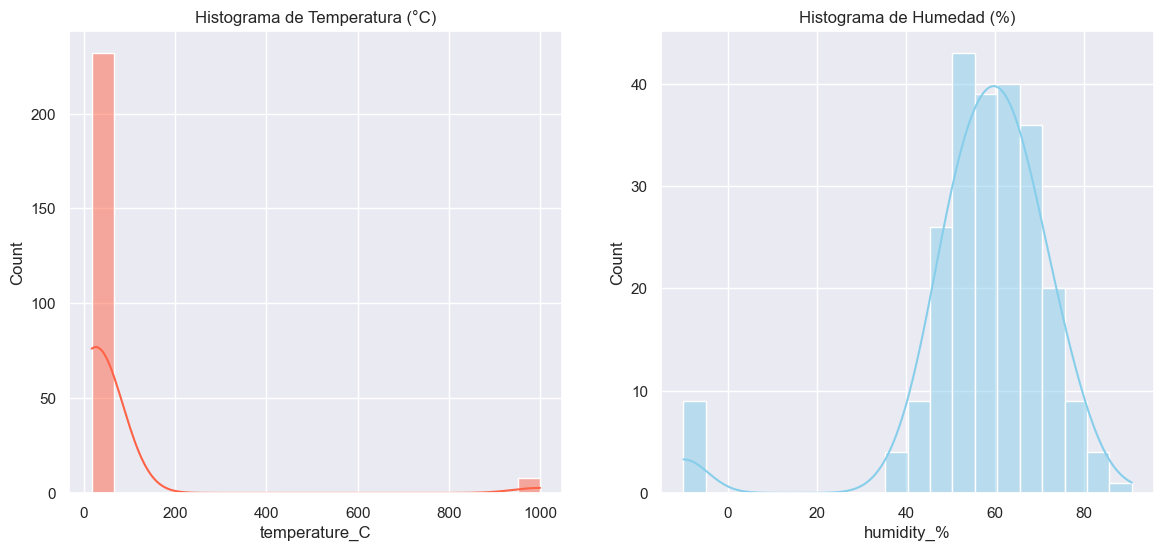

In [14]:
# Histograma
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df_clean['temperature_C'].astype(float), bins=20, kde=True, color='tomato')
plt.title('Histograma de Temperatura (°C)')

plt.subplot(1,2,2)
sns.histplot(df_clean['humidity_%'].astype(float), bins=20, kde=True, color='skyblue')
plt.title('Histograma de Humedad (%)')

plt.show()# Histograma
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.histplot(df_clean['temperature_C'].astype(float), bins=20, kde=True, color='tomato')
plt.title('Histograma de Temperatura (°C)')

plt.subplot(1,2,2)
sns.histplot(df_clean['humidity_%'].astype(float), bins=20, kde=True, color='skyblue')
plt.title('Histograma de Humedad (%)')

plt.show()

## Histograma de Temperatura y Humedad
- **Temperatura:** La mayoría de las mediciones se concentran entre **23°C y 30°C**, con un pico alrededor de **26–27°C**. Hay algunos valores extremos que podrían ser errores de sensor.  
- **Humedad:** La mayoría de las lecturas están entre **40% y 75%**, con un pico alrededor de **65%**. Se observan algunos valores negativos o muy bajos que parecen inconsistentes.  

# Boxplots

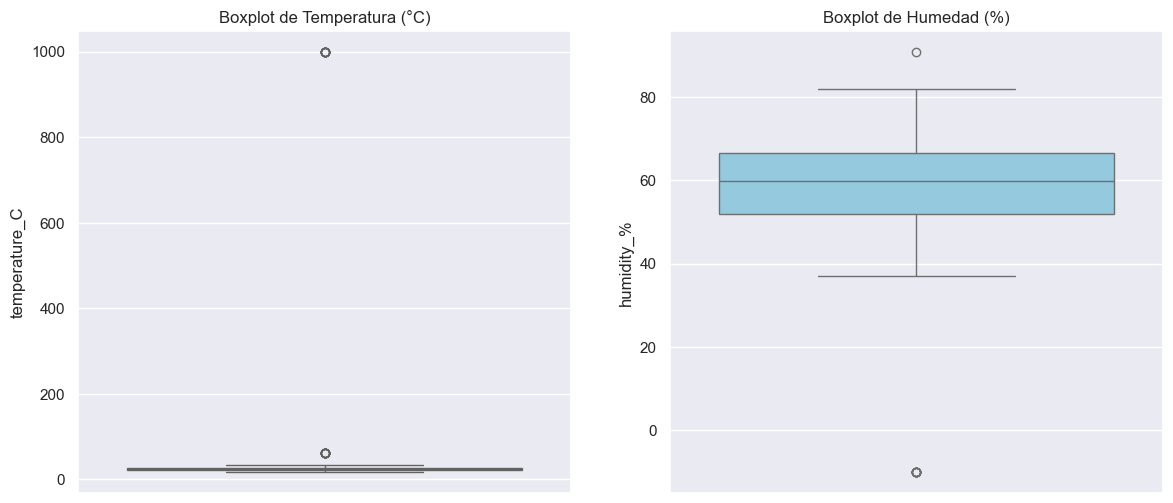

In [15]:
# Boxplots
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(y=df_clean['temperature_C'], color='tomato')
plt.title('Boxplot de Temperatura (°C)')

plt.subplot(1,2,2)
sns.boxplot(y=df_clean['humidity_%'], color='skyblue')
plt.title('Boxplot de Humedad (%)')

plt.show()

## Boxplot de Temperatura y Humedad
- **Temperatura:** La mediana está cerca de **26–27°C**. Los bigotes muestran que la variabilidad es moderada, y hay algunos **outliers** por encima de 30°C y por debajo de 24°C.  
- **Humedad:** La mediana está cerca de **65%**, con bigotes que muestran un rango amplio. Existen **outliers negativos o altos**, indicando posibles errores de medición.  


## Conclusión General
- Los sensores funcionan dentro de un rango esperado, pero se detectan **lecturas anómalas** que deben limpiarse antes de análisis avanzados.  
- La distribución general muestra que los valores se concentran en rangos específicos, pero con algunos **valores extremos** que pueden distorsionar promedios o tendencias.
